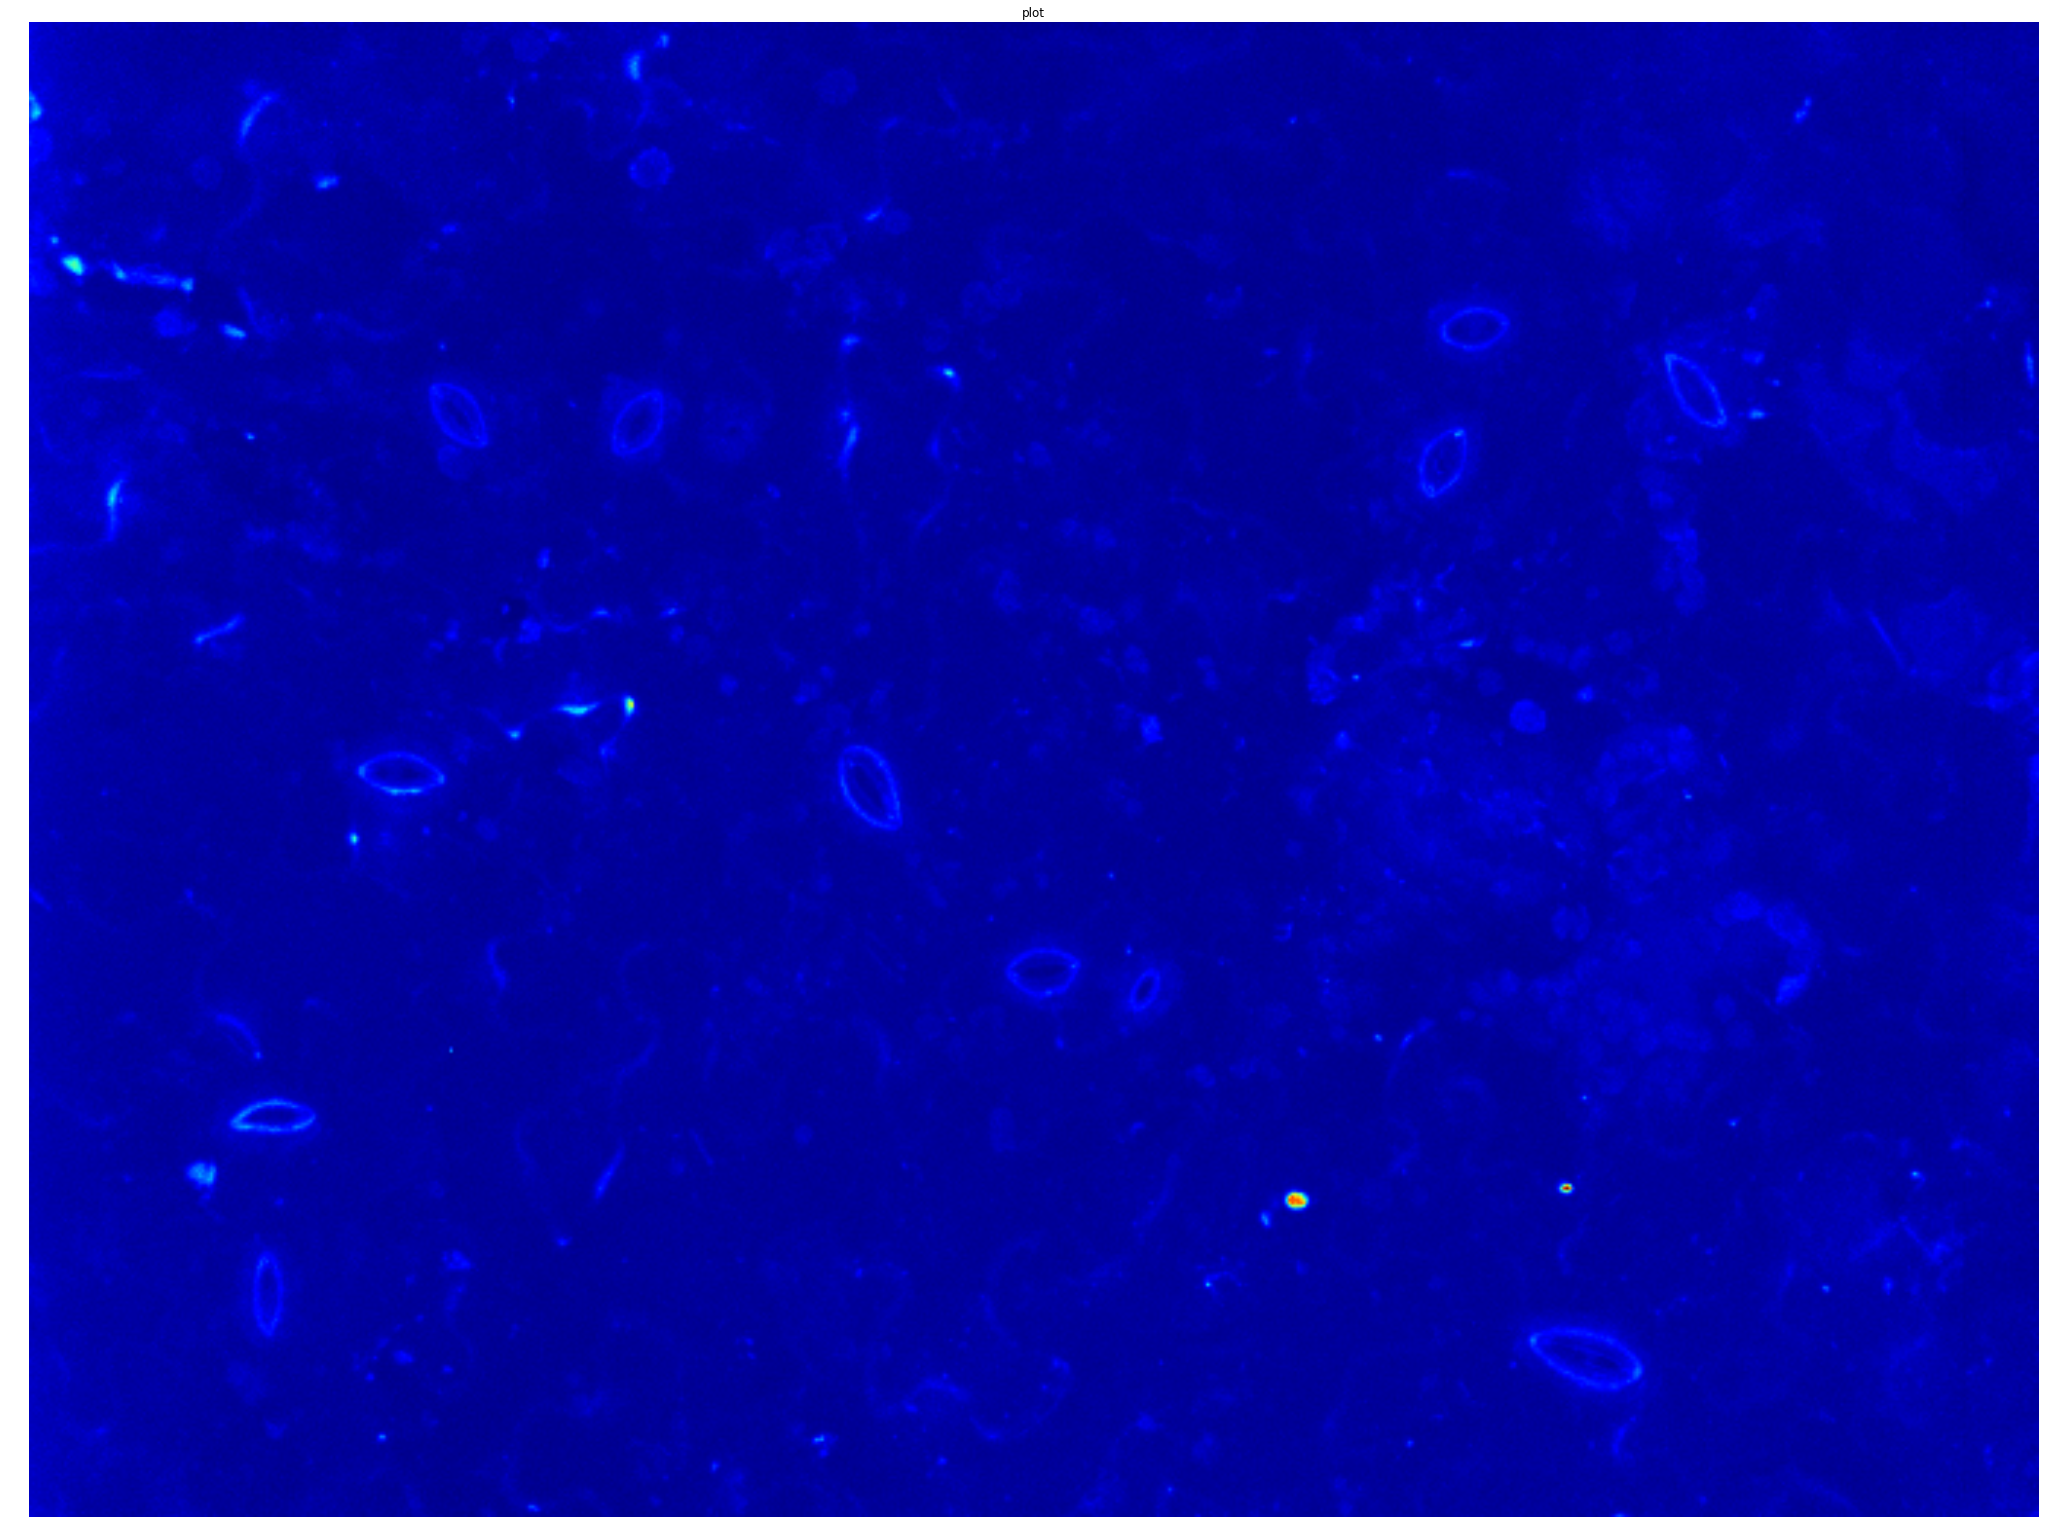

In [1]:
import numpy as np
from skimage import io
from skimage import exposure
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from skimage.morphology import reconstruction
from scipy import ndimage

def max_proj(img_list):
    return np.maximum.reduce(img_list)

def rescale(img):
    return exposure.rescale_intensity(img, in_range='uint16')

def maximum_project_flex(flex_file):
    flex =  io.imread(flex_file, conserve_memory=True, dtype=None)
    flex = max_proj(flex)
    return rescale(flex)

def imshow(image, title="none", **kwargs):
    fig, ax = plt.subplots(figsize=(36, 36))
    ax.imshow(image, **kwargs)
    ax.axis('off')
    ax.set_title(title)

mp = maximum_project_flex('test_data/Ok/002002002/002002002.flex')
imshow(mp, 'plot')

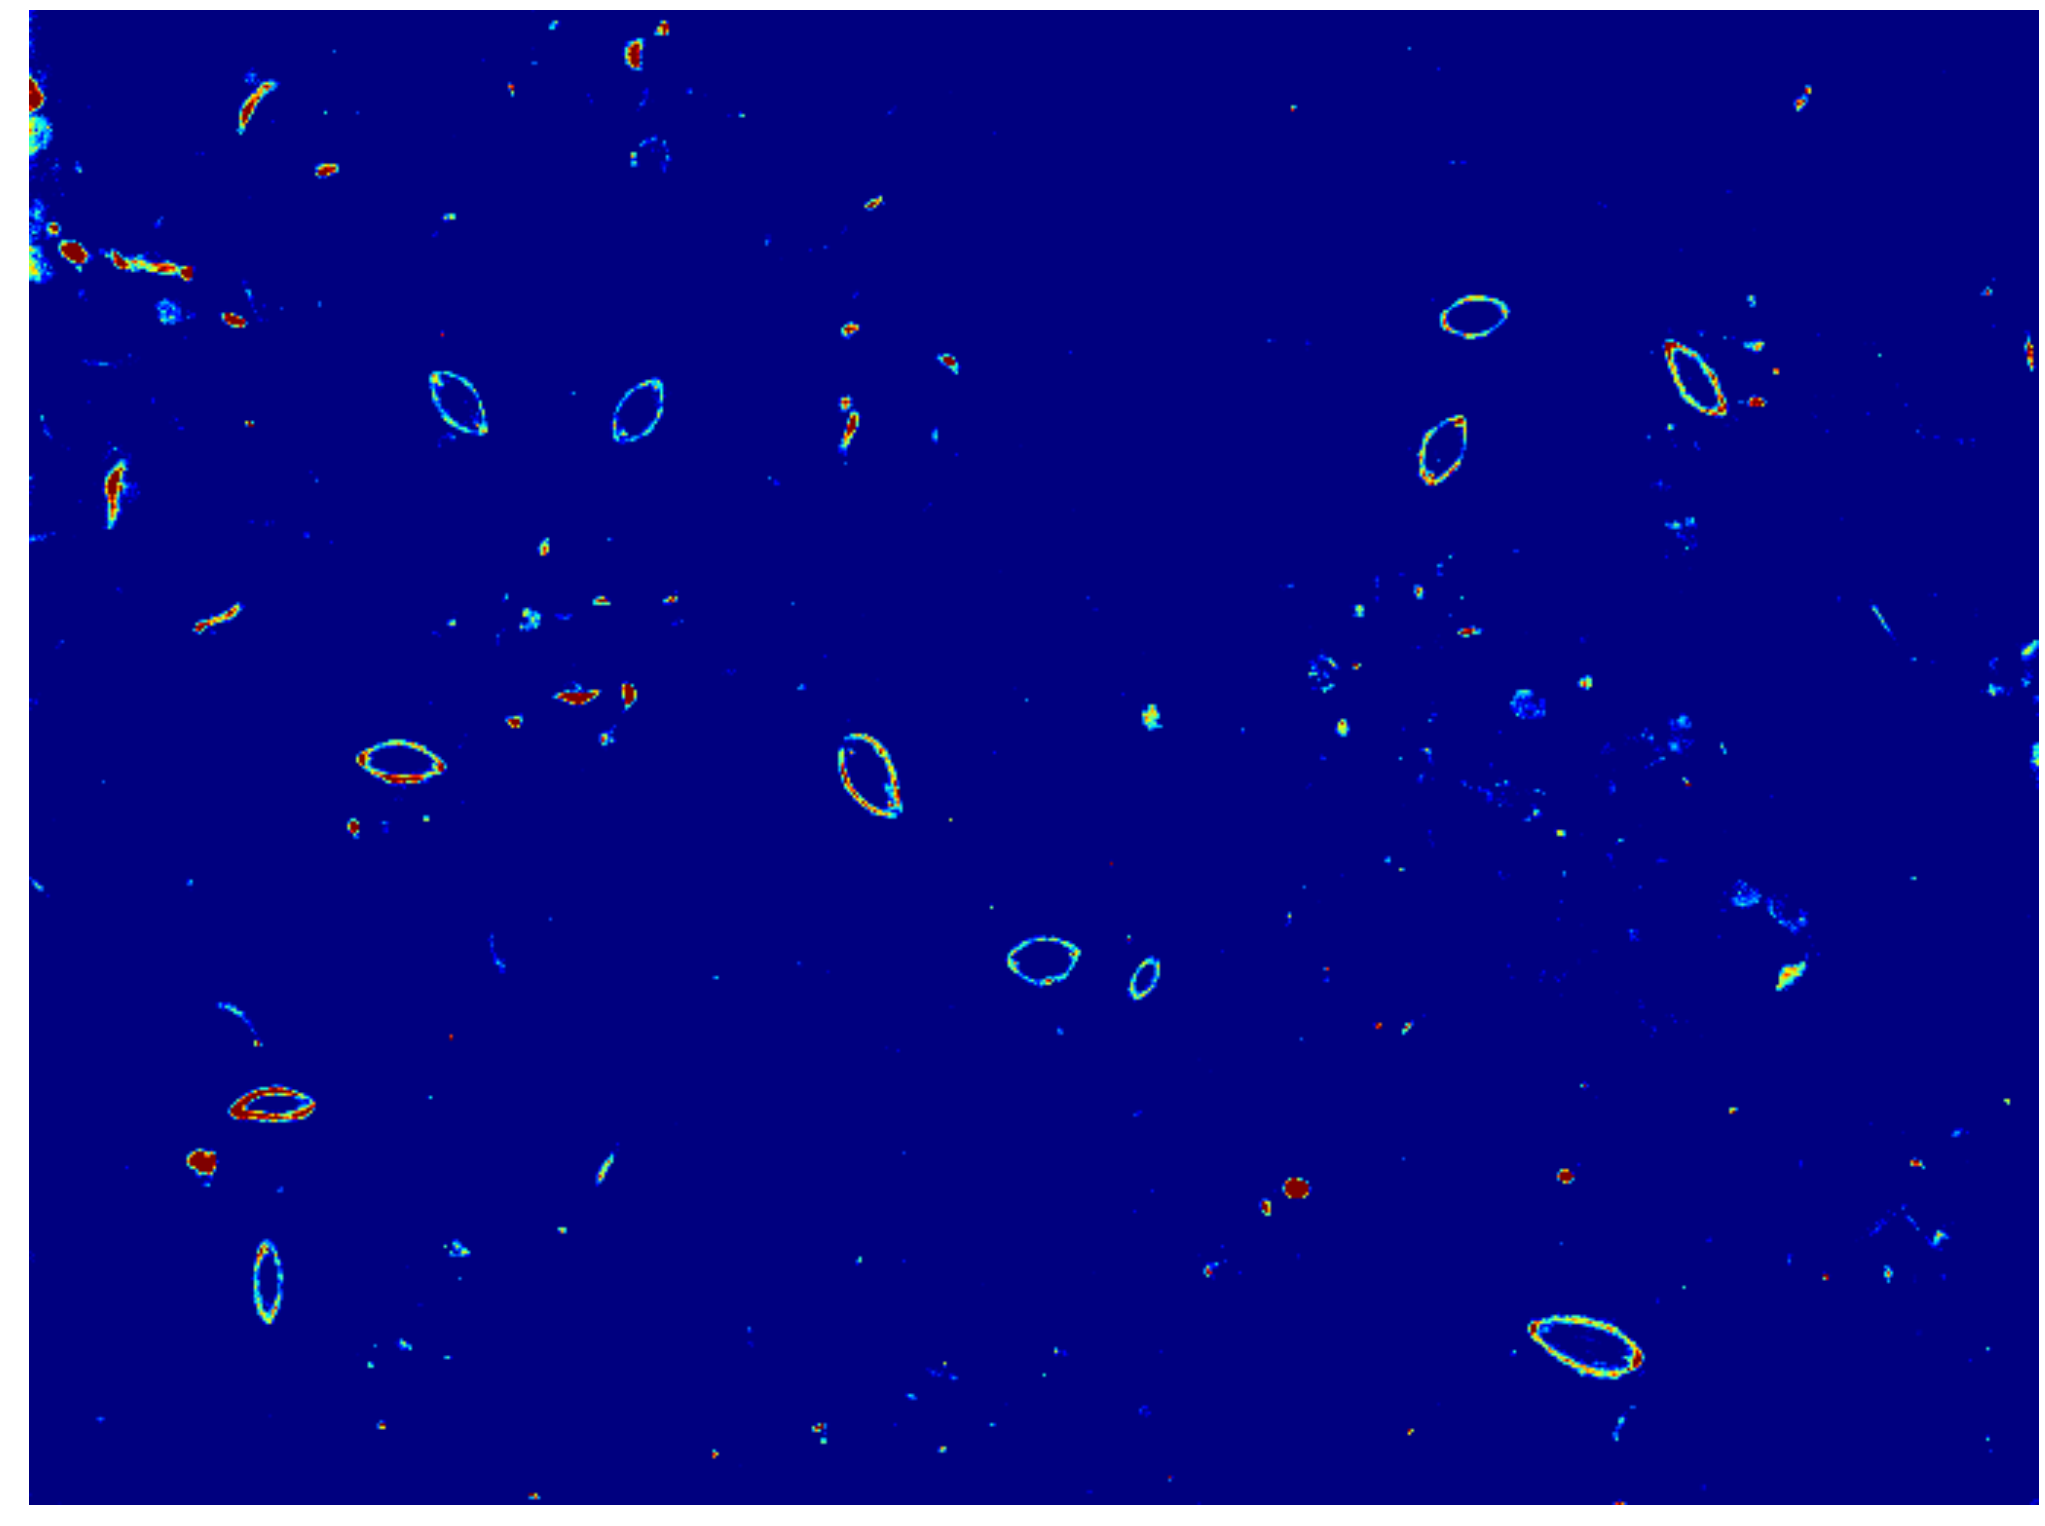

In [2]:
from skimage.exposure import rescale_intensity
rescaled = rescale_intensity(mp, in_range=(50, 100))
imshow(rescaled, "")

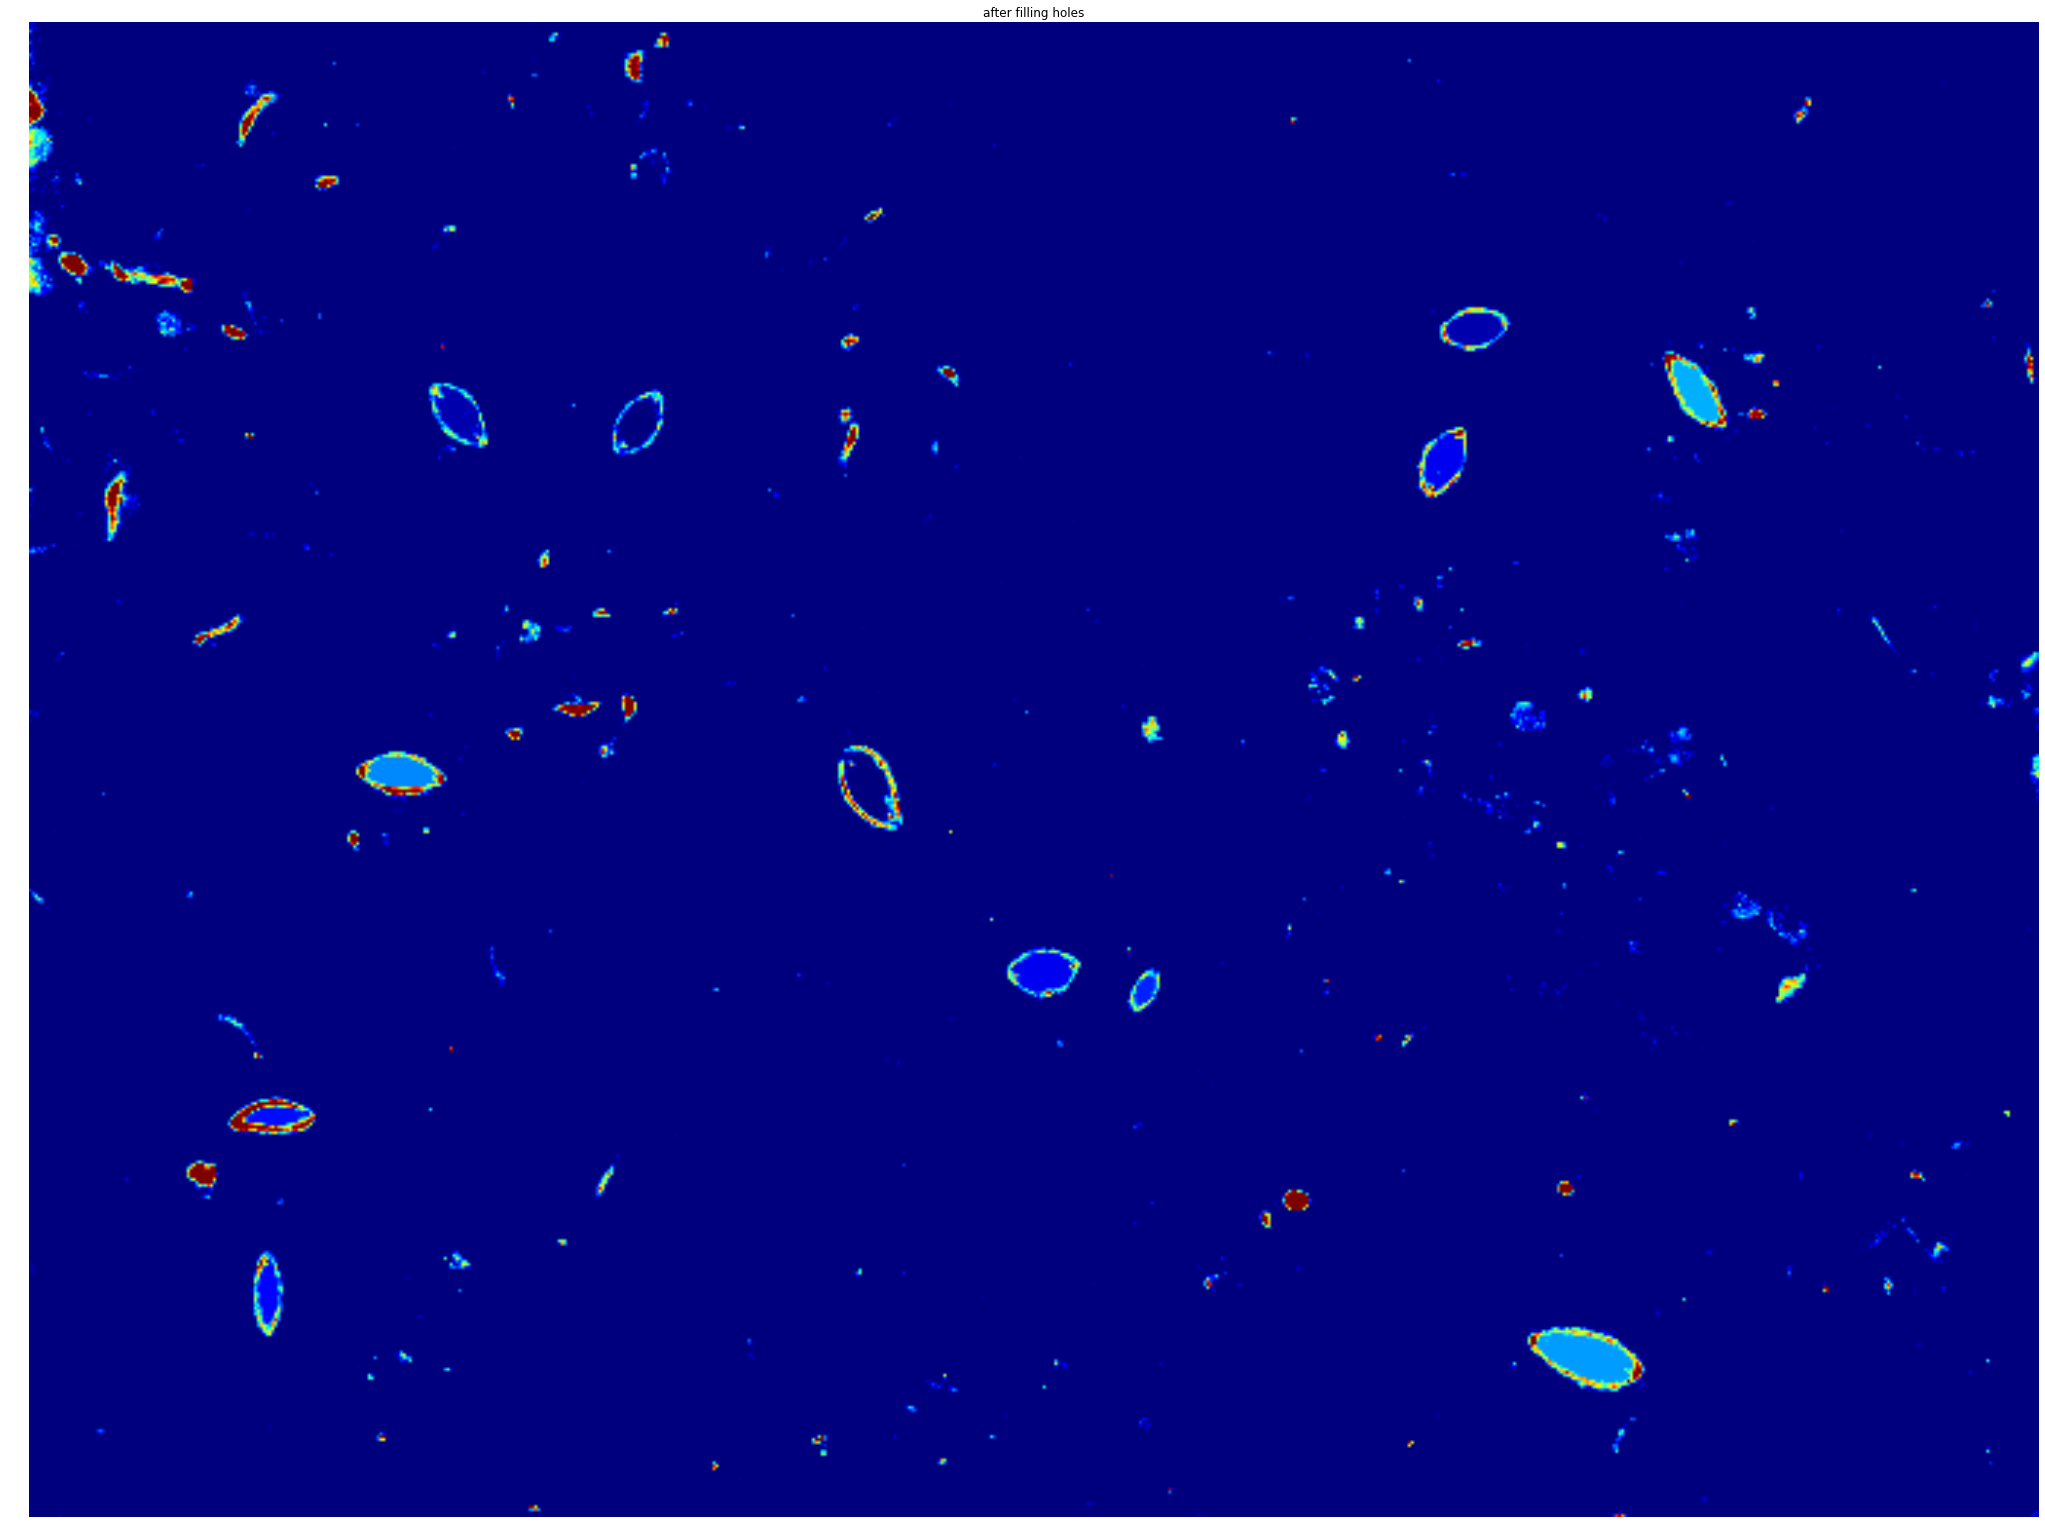

In [3]:
seed = np.copy(rescaled)
seed[1:-1, 1:-1] = rescaled.max()
mask = rescaled

filled = reconstruction(seed, mask, method='erosion')
imshow(filled, 'after filling holes', vmin=rescaled.min(), vmax=rescaled.max())

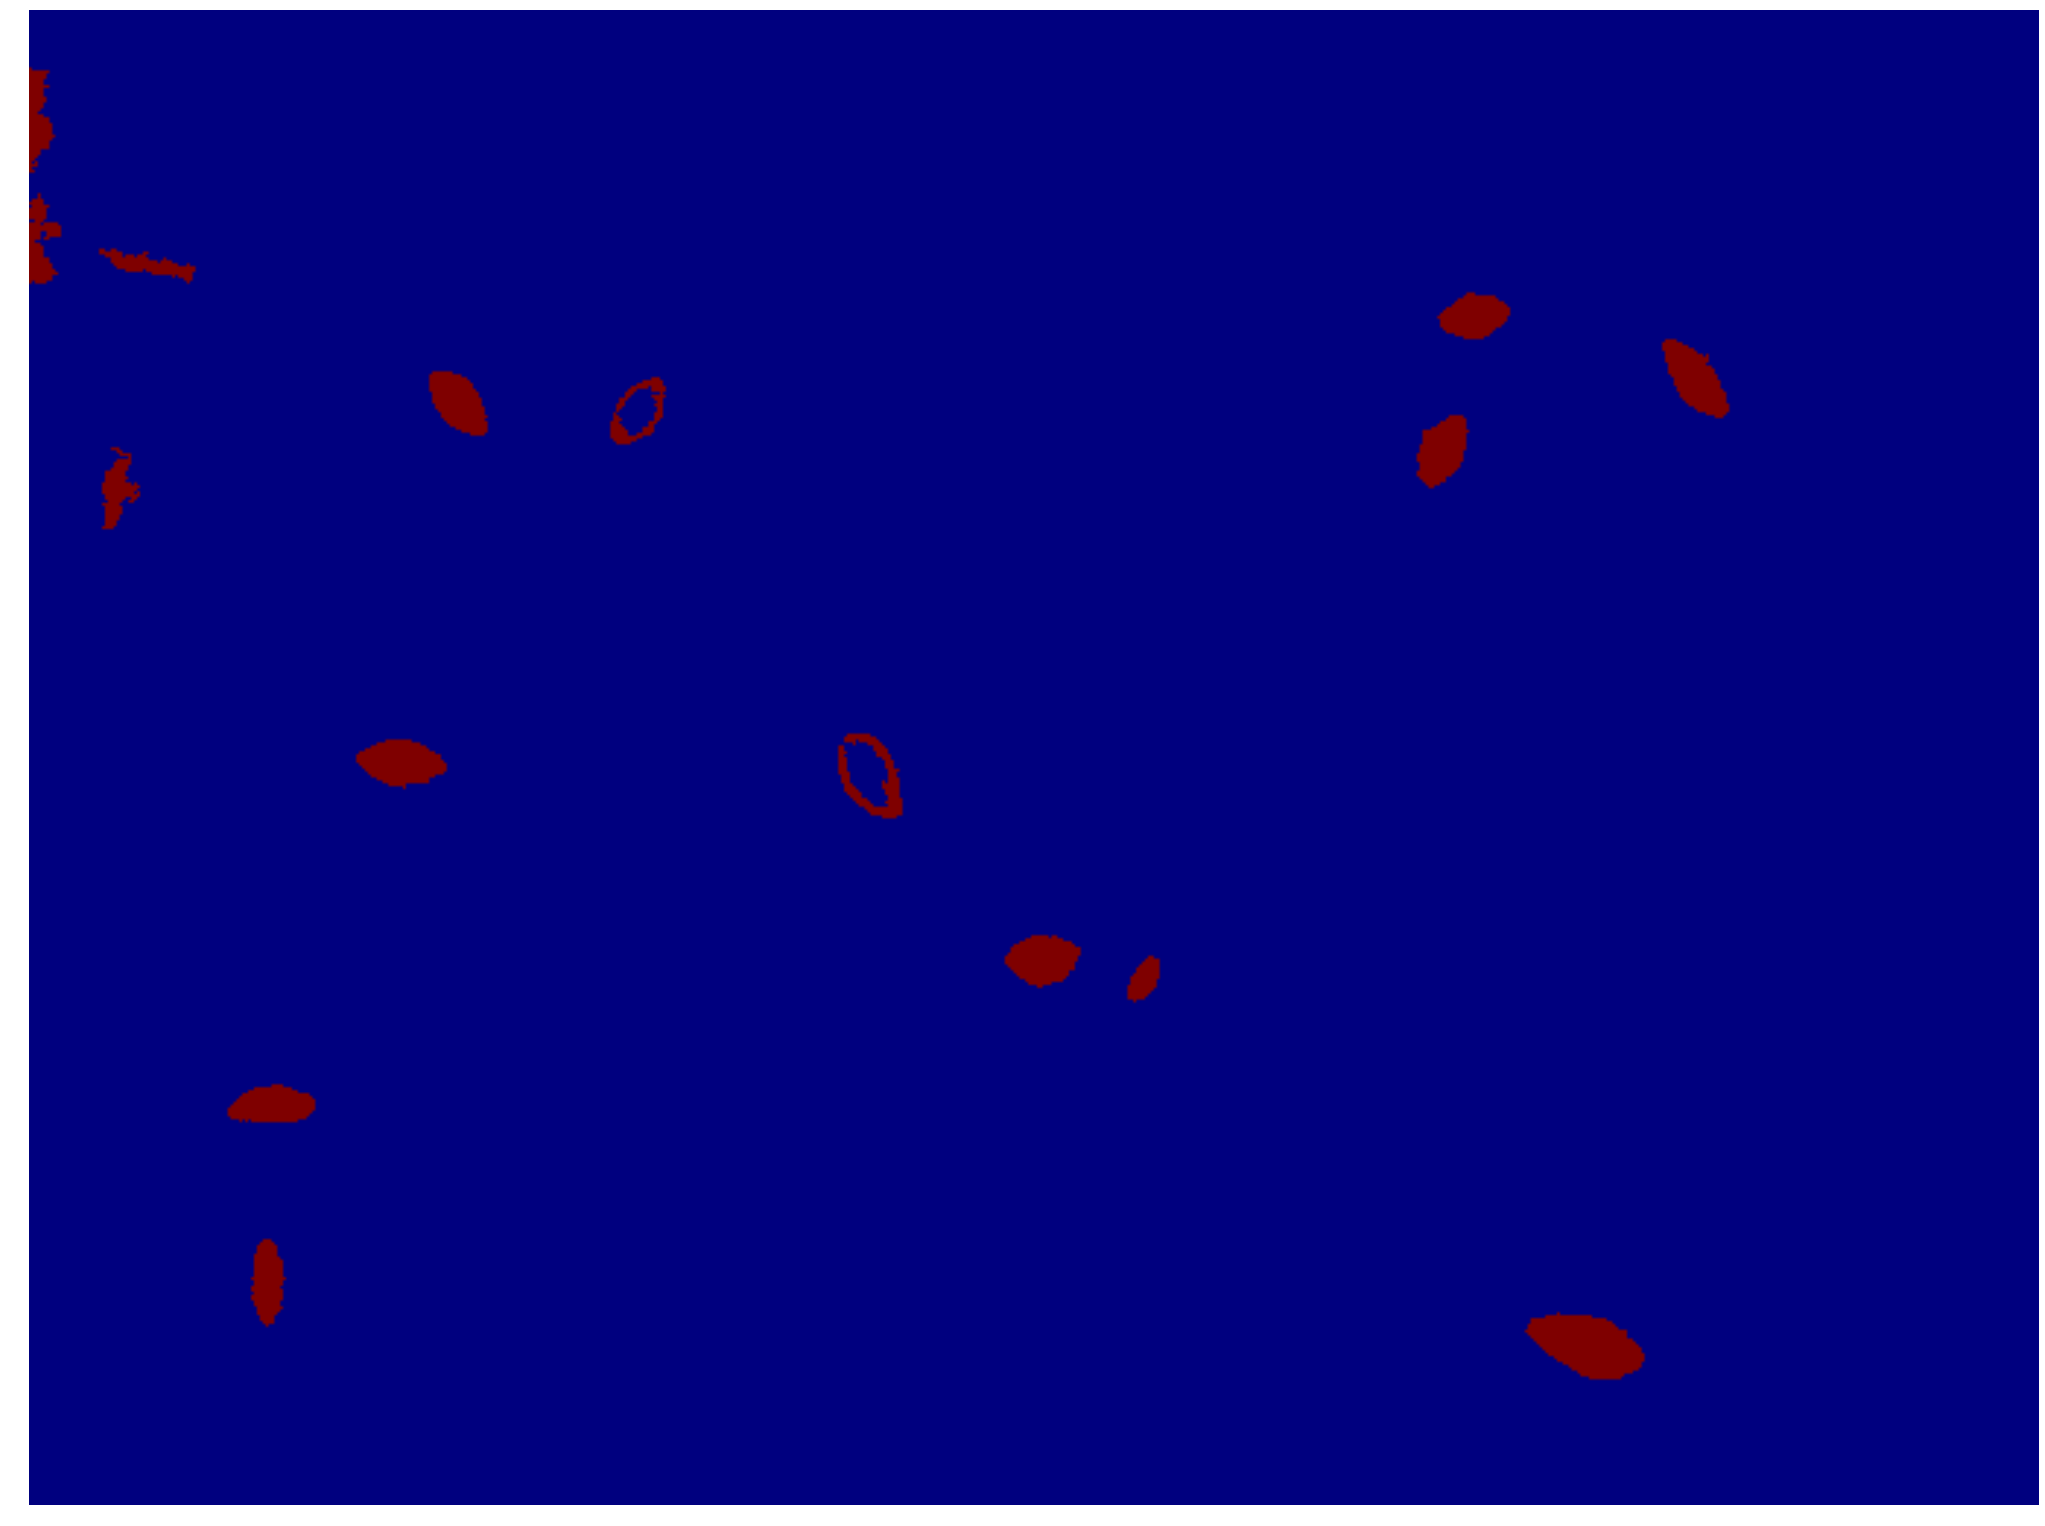

In [4]:
label_objects, nb_labels = ndimage.label(filled)
label_objects
sizes = np.bincount(label_objects.ravel())
mask_sizes = (sizes > 100) & (sizes < 1000) 
mask_sizes[0] = 0
big_objs = mask_sizes[label_objects]
imshow(big_objs,'')

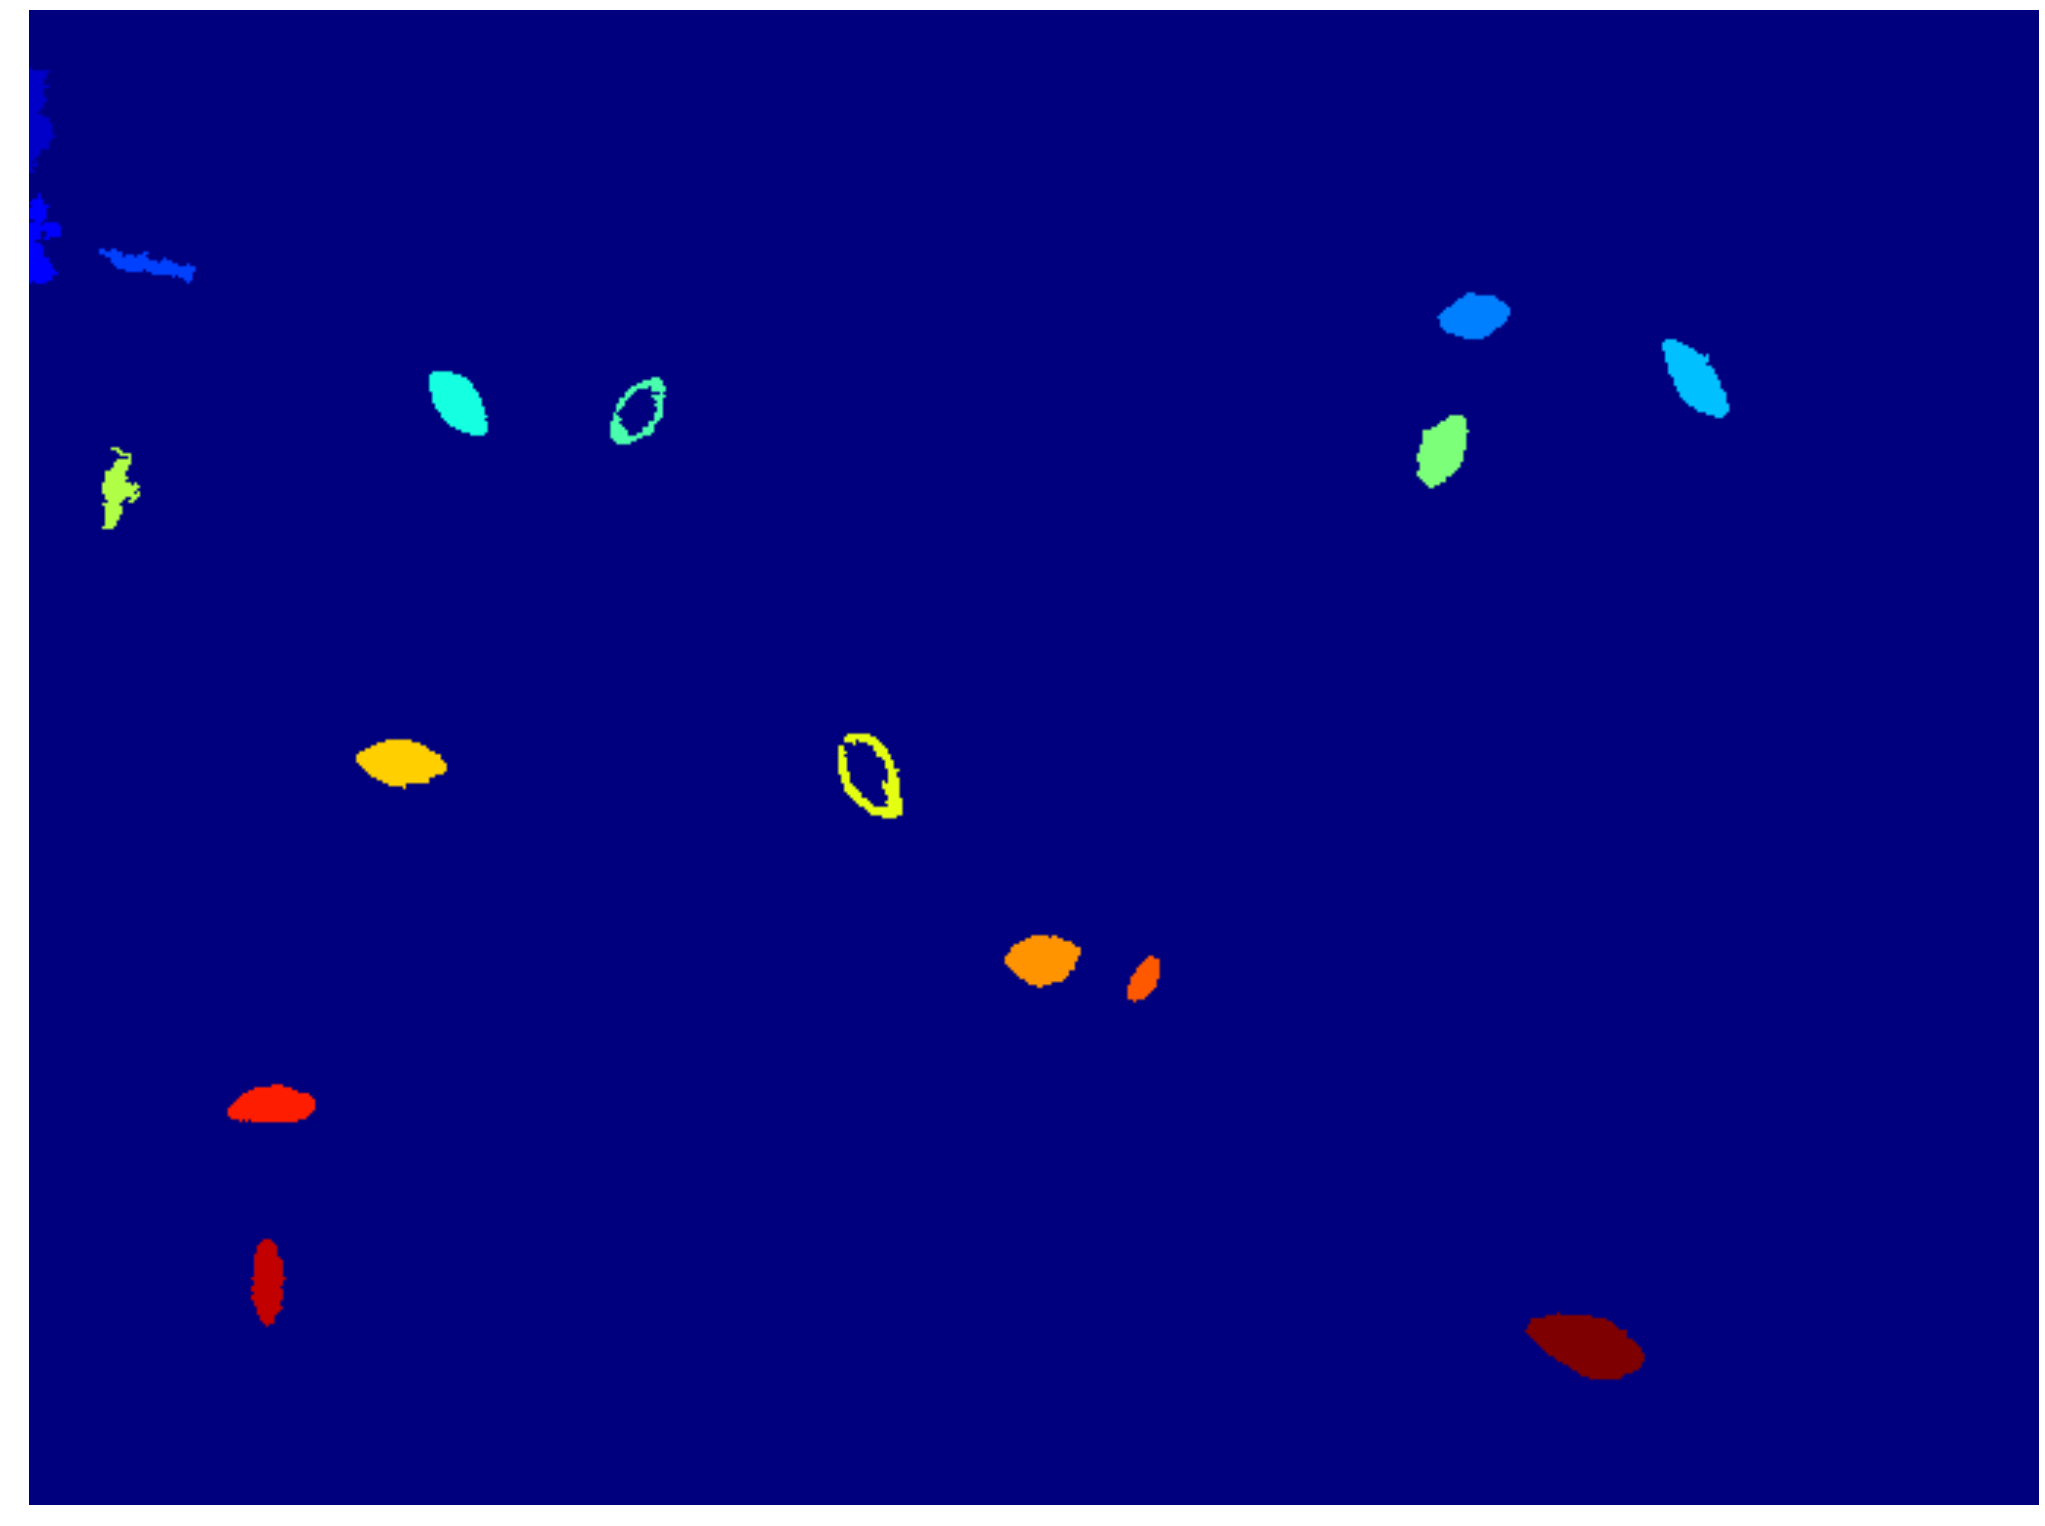

In [5]:
stomata, _ = ndimage.label(big_objs)
imshow(stomata, '')

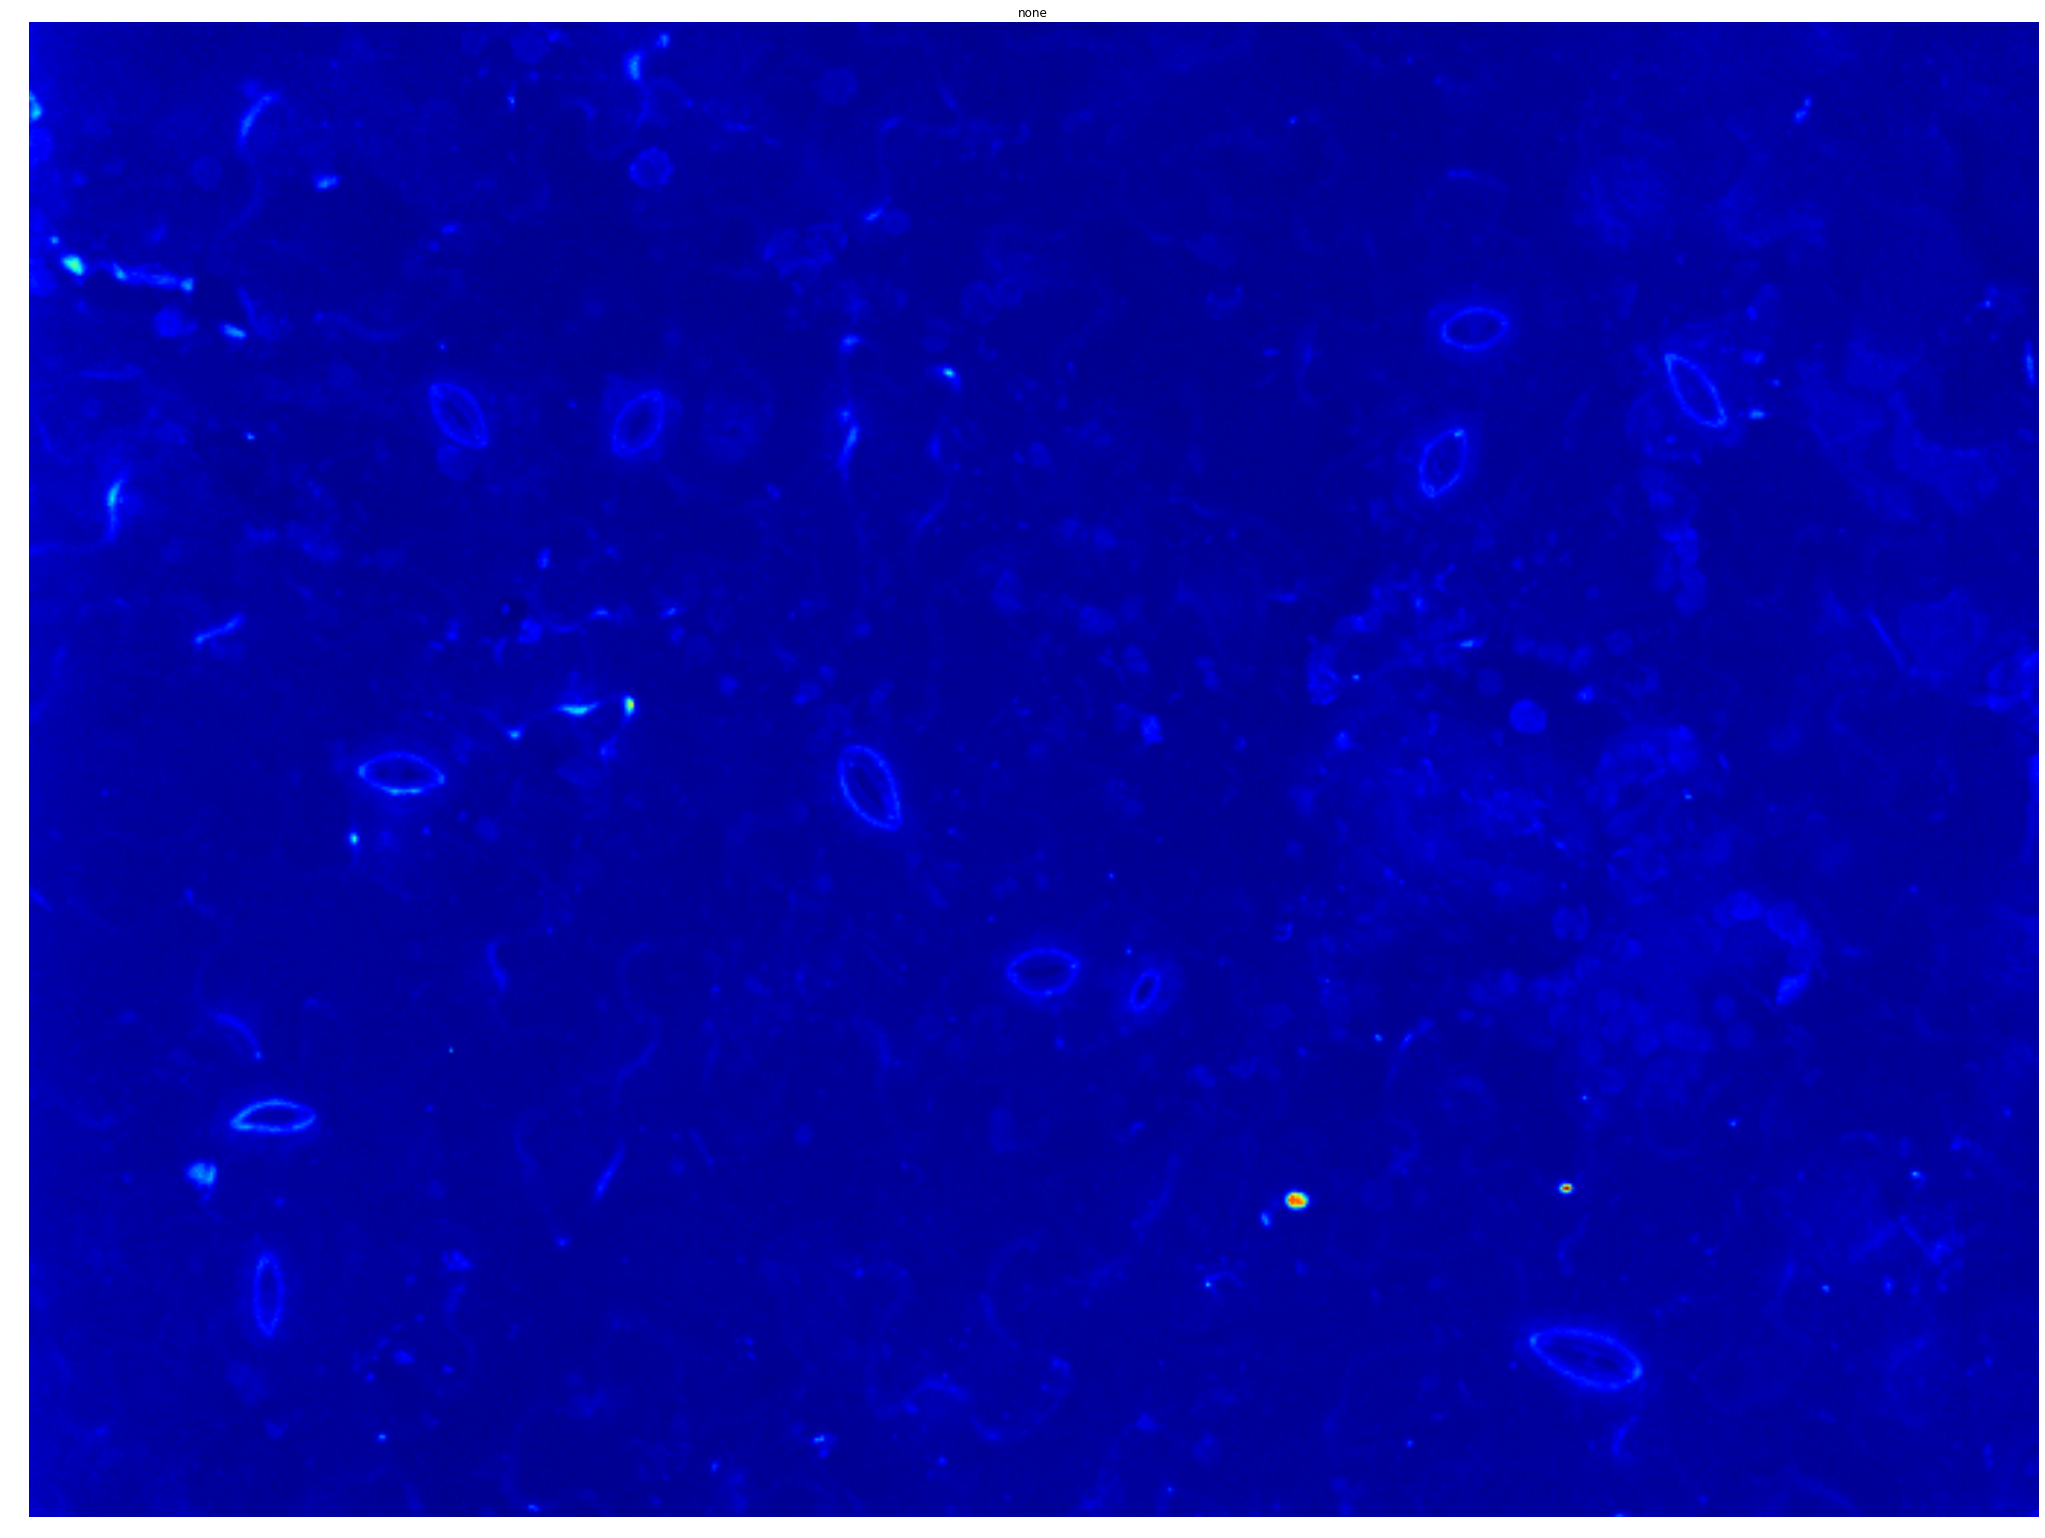

In [8]:
l = ndimage.find_objects(stomata)
imshow(mp)

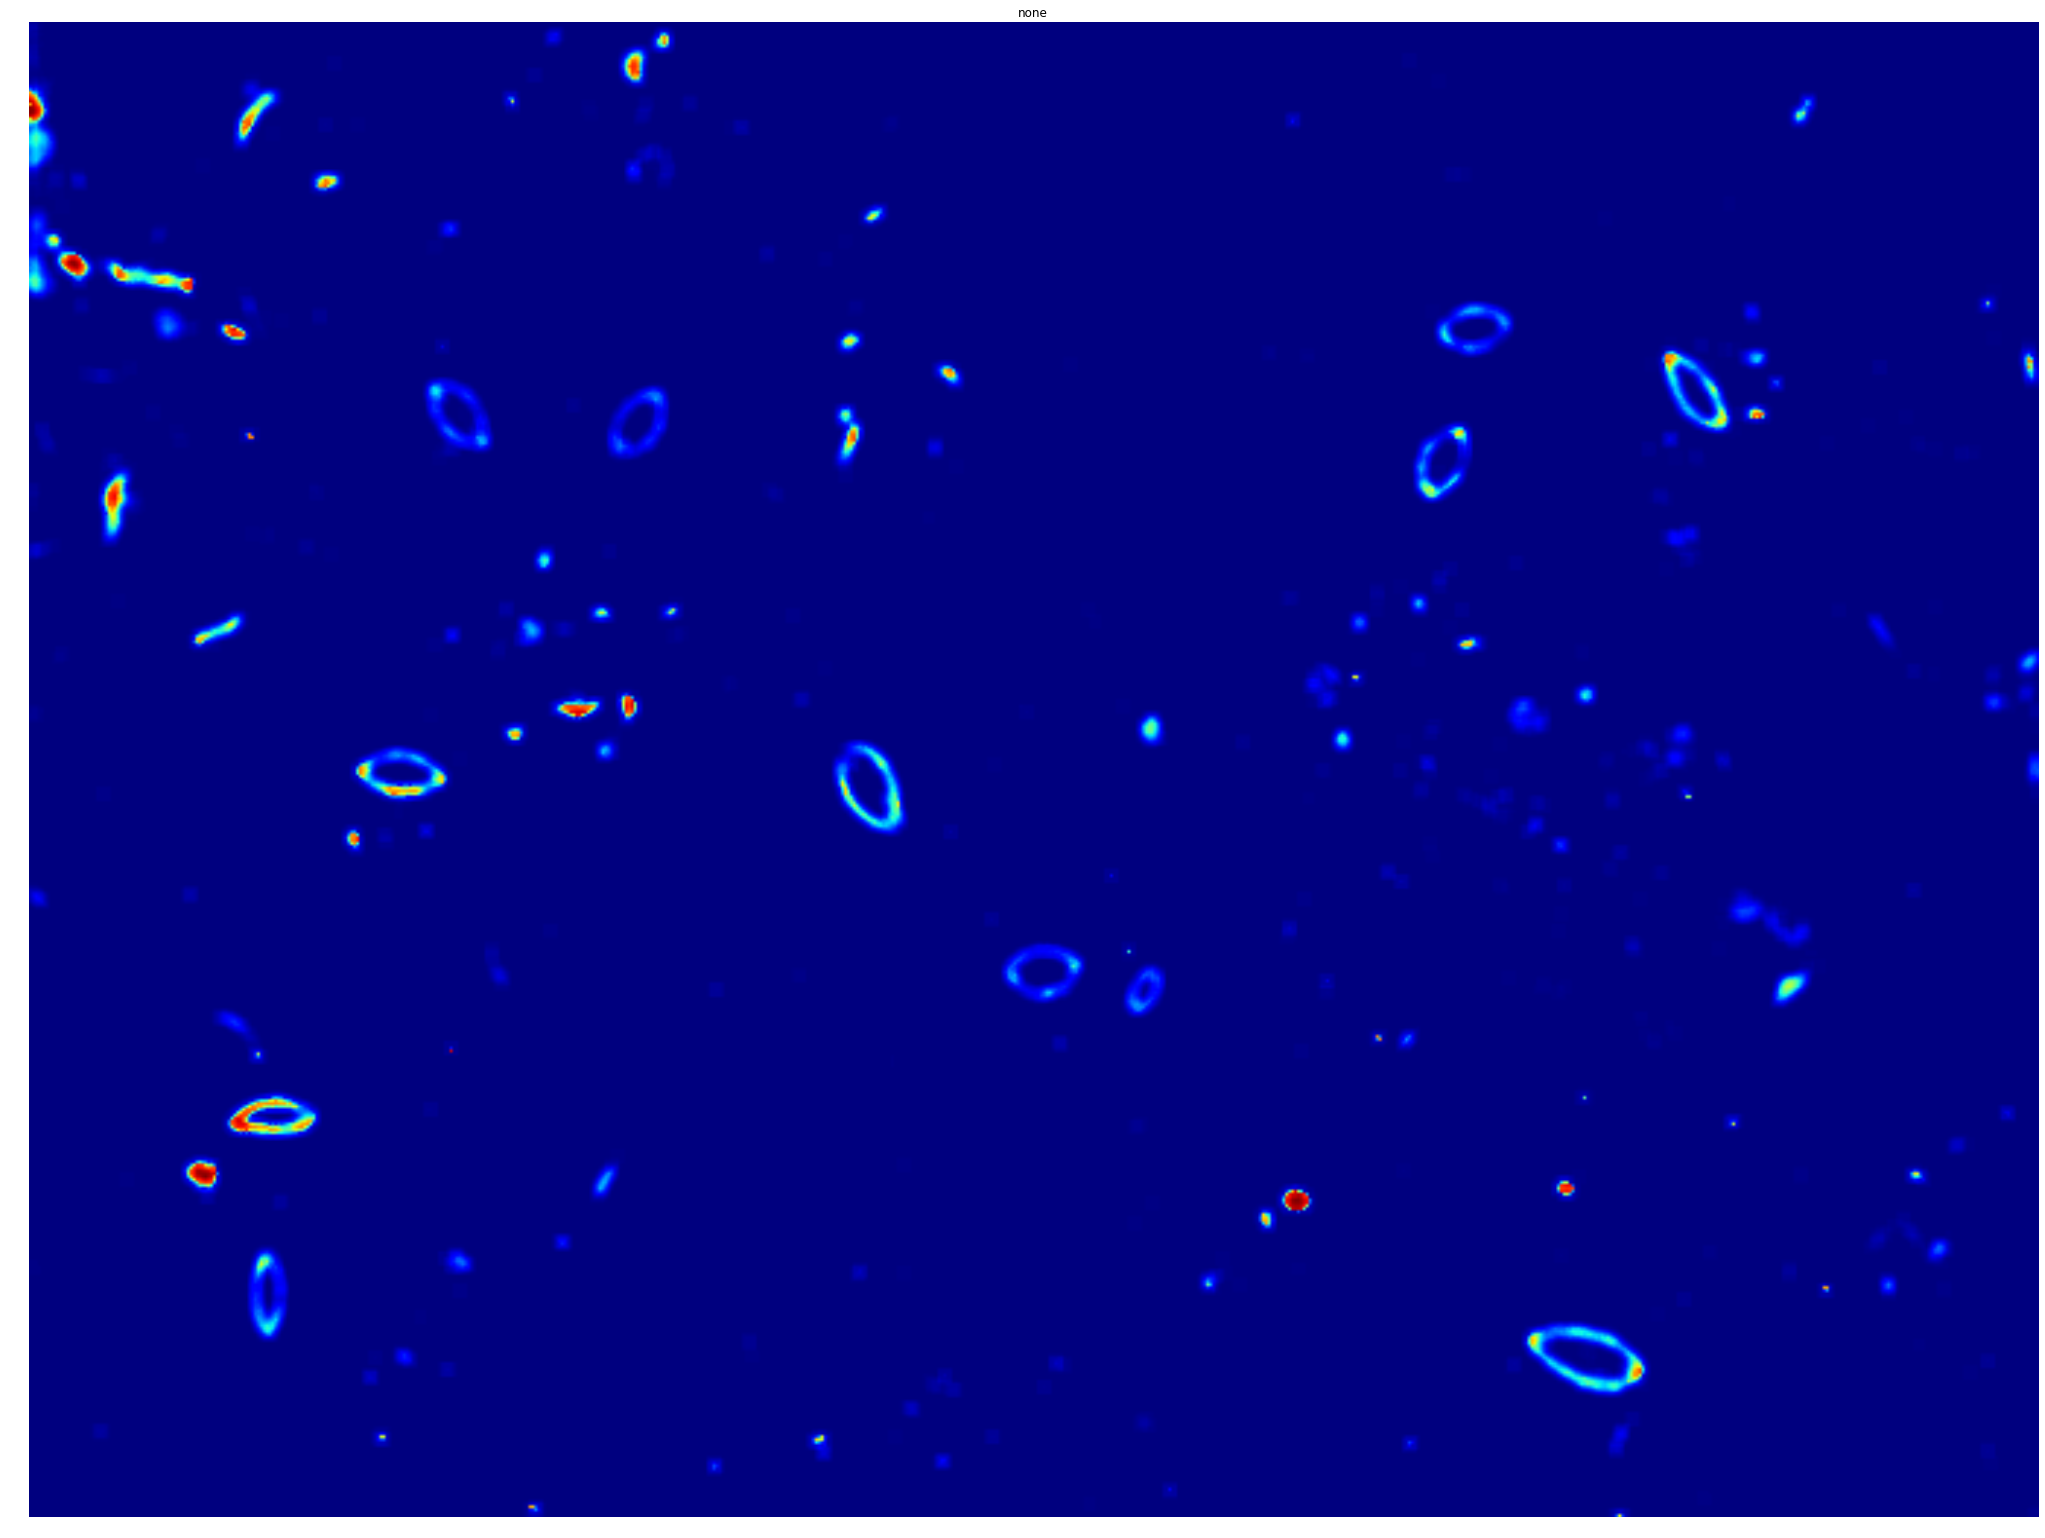

In [37]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
smooth = denoise_bilateral(rescaled, sigma_range=0.7, sigma_spatial=15)
imshow(smooth)

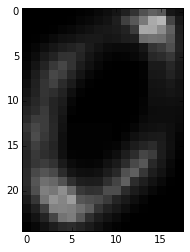

In [38]:
s = smooth[l[7]]
io.imshow(s)

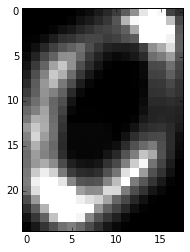

In [78]:
bright = rescale_intensity(s, in_range=(s.min(), s.max() / 2 ))
io.imshow(bright)

In [79]:
np.histogram(bright)

(array([158,  62,  51,  41,  35,  24,  18,  12,  11,  38]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

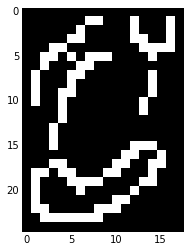

In [80]:
from skimage import feature
edges = feature.canny(bright, sigma=1)#, low_threshold=0.01, high_threshold=0.9)
io.imshow(edges)

In [70]:
from skimage.transform import hough_ellipse
result = hough_ellipse(edges)

In [71]:
result

array([(5, 6.5, 7.5, 6.48074069840786, 6.519202405202649, 3.064820762320015),
       (5, 6.5, 7.5, 6.519202405202649, 6.48074069840786, 1.6475682180646745),
       (10, 7.5, 7.5, 6.48074069840786, 6.519202405202649, 3.064820762320015),
       (10, 7.5, 7.5, 6.519202405202649, 6.48074069840786, 1.6475682180646745),
       (5, 6.5, 7.0, 2.6457513110645907, 6.5, 2.7468015338900313),
       (9, 8.5, 7.5, 6.48074069840786, 6.519202405202649, 3.064820762320015),
       (5, 8.0, 7.5, 6.576473218982953, 7.0, 1.7234456551901616),
       (9, 8.5, 7.5, 6.519202405202649, 6.48074069840786, 1.6475682180646745),
       (5, 9.0, 7.5, 6.5, 8.306623862918075, 1.5707963267948966),
       (5, 8.0, 10.0, 7.280109889280518, 6.324555320336759, 2.819842099193151),
       (5, 6.5, 8.5, 5.70087712549569, 5.656854249492381, 2.231839495645583),
       (6, 7.5, 8.5, 5.656854249492381, 5.70087712549569, 2.4805494847391065),
       (10, 7.5, 7.5, 6.519202405202649, 6.48074069840786, 2.137525544318403),
       (6, 7

In [72]:
result.sort(order='accumulator')
best = result[-1]
yc = int(best[1])
xc = int(best[2])
a = int(best[3])
b = int(best[4])
orientation = best[5]

In [73]:
from skimage.draw import ellipse_perimeter
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
cy

array([-2, -1,  0,  1, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 24, 23, 22, 25,
       24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,
        7,  6,  5,  4,  3,  2,  1])

In [77]:
from skimage import data, filters, color
col = color.gray2rgb(bright)
col[cy, cx] = (1, 0, 0)

IndexError: index 25 is out of bounds for axis 0 with size 25

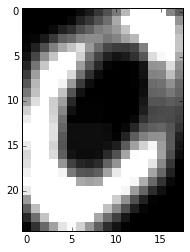

In [75]:
io.imshow(col)

In [85]:
a = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(a)
y = 100 + 100*np.sin(a)
init = np.array([x, y]).T

In [89]:
init

array([[  3.20000000e+02,   1.00000000e+02],
       [  3.19987601e+02,   1.01574668e+02],
       [  3.19950408e+02,   1.03148946e+02],
       [  3.19888430e+02,   1.04722442e+02],
       [  3.19801683e+02,   1.06294768e+02],
       [  3.19690187e+02,   1.07865533e+02],
       [  3.19553971e+02,   1.09434347e+02],
       [  3.19393068e+02,   1.11000822e+02],
       [  3.19207518e+02,   1.12564569e+02],
       [  3.18997367e+02,   1.14125200e+02],
       [  3.18762668e+02,   1.15682329e+02],
       [  3.18503478e+02,   1.17235569e+02],
       [  3.18219862e+02,   1.18784535e+02],
       [  3.17911890e+02,   1.20328842e+02],
       [  3.17579638e+02,   1.21868109e+02],
       [  3.17223190e+02,   1.23401953e+02],
       [  3.16842632e+02,   1.24929994e+02],
       [  3.16438060e+02,   1.26451853e+02],
       [  3.16009574e+02,   1.27967153e+02],
       [  3.15557281e+02,   1.29475517e+02],
       [  3.15081291e+02,   1.30976573e+02],
       [  3.14581724e+02,   1.32469947e+02],
       [  